# Linear Regression with Scikit Learn

In this program we will try to predict the scores of students with given their no. of studying hours.
Wel will use Scikit-learn library to implement simple linear regression with 2 variables - No. of Hours as Features/input(x) & Scores as Label/output(y) 

In [1]:
# importing pandas
import pandas as pd

In [2]:
# Reading data from csv file
dataset = pd.read_csv("scores.csv")

In [3]:
# displaying the entire dataset
df_dataset= pd.DataFrame({'Features' : dataset['Hours'] ,'Actual': dataset['Scores']})
df_dataset

,Features,Actual
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Retreiving info of our dataset to see if there's a missing value or not
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

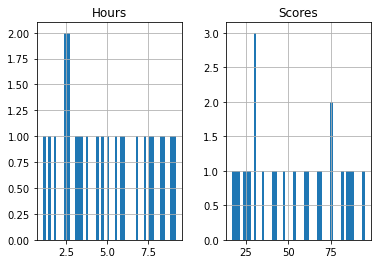

In [7]:
# # For plotting histogram
import matplotlib.pyplot as plt
dataset.hist(bins=50)

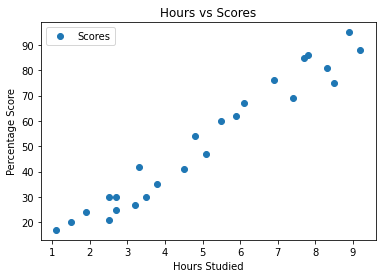

In [8]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Splitting the Train Test Datasets

In [9]:
# Training Testing Data Splitting by 80-20 ratio i.e 80% for training_data & remaining 20% (i.e 0.2) for testing_dataset
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(dataset , test_size = 0.2)

In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 16 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   20 non-null     float64
 1   Scores  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [11]:
training_data.describe()

,Hours,Scores
count,20.00000,20.000000
mean,5.22000,53.050000
std,2.38804,24.487322
min,1.50000,20.000000
25%,3.27500,30.000000
50%,4.95000,50.500000
75%,7.10000,75.250000
max,9.20000,95.000000


In [12]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 19 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   5 non-null      float64
 1   Scores  5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 120.0 bytes


In [13]:
testing_data.describe()

,Hours,Scores
count,5.000000,5.000000
mean,4.180000,45.200000
std,3.176004,30.441748
min,1.100000,17.000000
25%,1.900000,24.000000
50%,2.700000,30.000000
75%,7.400000,69.000000
max,7.800000,86.000000


# Finding Corelation Coefficients between Features & Labels


In [14]:
#Spearson Corelation Matrix
corr_matrix = dataset.corr()
corr_matrix['Scores'].sort_values(ascending=False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

We can see here that the no. of hours positively corelates with with Scores

# Defining Features/Inputs & Labels/Outputs for training & test data


In [15]:
# for Training Data
training_data_features = training_data["Hours"].copy()
training_data_labels = training_data["Scores"].copy()


In [16]:
# for testing data
testing_data_features = testing_data["Hours"].copy()
testing_data_labels = testing_data["Scores"].copy()

# Training the Algorithm

In [17]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#training the model, feeding training features & labels

#1st reshape/convert my training inputs from 1D array to 2D array, as the model only accepts 2d array
training_data_features_new = training_data_features.values.reshape(-1,1)

#now train the model
model.fit(training_data_features_new, training_data_labels)

LinearRegression()

# Making predictions on training data

In [18]:
predictions = model.predict(training_data_features.values.reshape(-1, 1)) # predicting values of training x values

In [19]:
# Displaying dataframe for features, actual & predicted values for training data
df_train= pd.DataFrame({'Features' : training_data_features ,'Actual': training_data_labels, 'Predicted': predictions})
df_train

,Features,Actual,Predicted
16,2.5,30,25.906232
18,6.1,67,61.831807
2,3.2,27,32.891760
5,1.5,20,15.926905
11,5.9,62,59.835942
12,4.5,41,45.864885
8,8.3,81,83.786326
22,3.8,35,38.879356
7,5.5,60,55.844211
0,2.5,21,25.906232


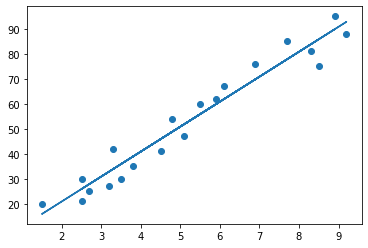

In [20]:
# Plotting combined graph of training_features vs training_actual_values (DOTS)
# and training_features vs predictions at training data (LINE)
plt.scatter(training_data_features_new, training_data_labels) # Plot for ACTUAL VALUES DOTS
plt.plot(training_data_features, predictions); #Plot for PREDICTED VALUES LINE
plt.show()

# Evaluating the model at Training Data - Root Mean Square Error

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(training_data_labels, predictions) #mean squared error
rmse = np.sqrt(mse) #root mean squared error

In [22]:
rmse

5.488641415102598

# saving the model

In [23]:
from joblib import dump, load
dump(model, 'marks_predict.joblib') 

['marks_predict.joblib']

# testing the model, making predictions on testing data

In [24]:
# using test outputs/features & inputs/labels defined before, checking the accuracy of the model
final_predictions = model.predict(testing_data_features.values.reshape(-1, 1))


In [25]:
# Comparing Actual vs Predicted
df_test= pd.DataFrame({'Features' : testing_data_features ,'Actual': testing_data_labels, 'Predicted': final_predictions})  
df_test

,Features,Actual,Predicted
19,7.4,69,74.804932
14,1.1,17,11.935174
24,7.8,86,78.796663
17,1.9,24,19.918636
20,2.7,30,27.902097


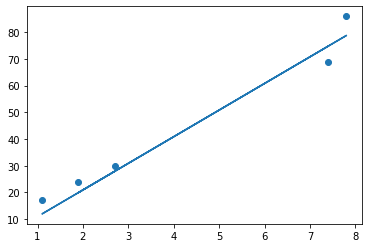

In [26]:
# Plotting combined graph of testing_features vs testing_actual_values (DOTS)
# and testing_features vs predictions at training data (LINE)
plt.scatter(testing_data_features,testing_data_labels) # Plot for ACTUAL VALUES DOTS
plt.plot(testing_data_features,final_predictions); #Plot for PREDICTED VALUES LINE
plt.show()

# Using the model - Predicting the value at x=9.25

In [27]:
input_hrs = np.array([[9.25]])
pred = model.predict(input_hrs)

print("Predicted Score for given hours = {}".format(pred[0]))

Predicted Score for given hours = 93.26668635558178


# Evaluating The Model on Testing Data

In [28]:
final_mse = mean_squared_error(testing_data_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

5.143860367034812
